In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
AusBeer = pd.read_csv("../01 Modulunterlagen/SW10/AustralianBeer.csv", sep = ";", header = 0)

In [3]:
AusBeer1 = AusBeer.copy()
AusBeer1.head()

,Quarter,megalitres
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [4]:
AusBeer1["Quarter"] = pd.to_datetime(AusBeer["Quarter"])

In [5]:
AusBeer1.set_index("Quarter", inplace = True)

In [6]:
AusBeer1.head()

,megalitres
Quarter,
1956-01-01,284.4
1956-04-01,212.8
1956-07-01,226.9
1956-10-01,308.4
1957-01-01,262.0


In [7]:
AusBeer1.describe()

,megalitres
count,154.000000
mean,408.267532
std,97.598588
min,212.800000
25%,325.425000
50%,427.450000
75%,466.950000
max,600.000000


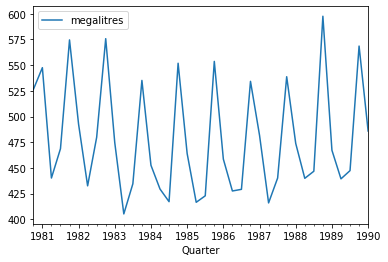

In [8]:
AusBeer1.loc["1980-9" : "1990-3"].plot()

In [9]:
AusBeer1.loc["1980"].head()
print(AusBeer1.loc["1980"].head())

            megalitres
Quarter               
1980-01-01       504.5
1980-04-01       427.3
1980-07-01       473.1
1980-10-01       526.2


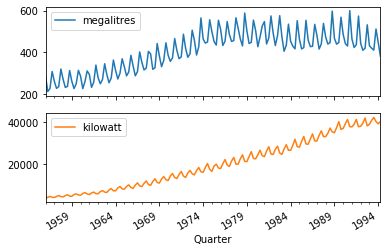

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
AusBeer = pd.read_csv("../01 Modulunterlagen/SW10/AustralianBeer.csv", sep = ";", header = 0)
AusEl = pd.read_csv("../01 Modulunterlagen/SW10/AustralianElectricity.csv", sep = ";")
Aussie = AusBeer.copy()
# Hier wird der Datensatz um eine Spalte kilowatt erweitert
Aussie["kilowatt"] = AusEl["kilowatt"]
Aussie["Quarter"] = pd.to_datetime(Aussie["Quarter"])
Aussie.set_index("Quarter", inplace = True)
Aussie.plot(subplots = True)
plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
AirP = pd.read_csv("../01 Modulunterlagen/SW10/AirPassengers.csv", index_col=0, parse_dates=True)
AirP.head(3)
print(AirP.head(3))


            Passengers
TravelDate            
1949-01-01         112
1949-02-01         118
1949-03-01         132


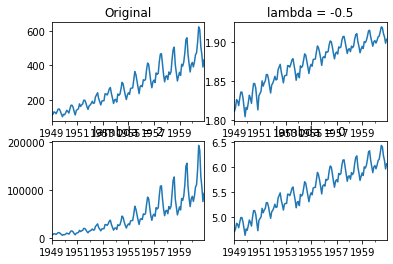

In [15]:
def boxcox(x,lambd):
    return np.log(x) if (lambd==0) else (x**lambd-1)/lambd
AirP["l_2"] = boxcox(AirP["Passengers"],2)
AirP["l_0"] = boxcox(AirP["Passengers"],0)
AirP["l_-05"] = boxcox(AirP["Passengers"],-.5)
plt.subplot(221)
AirP["Passengers"].plot()
plt.title("Original")
plt.xlabel("")
plt.subplot(222)
AirP["l_-05"].plot()
plt.title("lambda = -0.5")
plt.xlabel("")
plt.subplot(223)
AirP["l_2"].plot()
plt.title("lambda = 2")
plt.xlabel("")
plt.subplot(224)
AirP["l_0"].plot()
plt.title("lambda = 0")
plt.xlabel("")
plt.show()

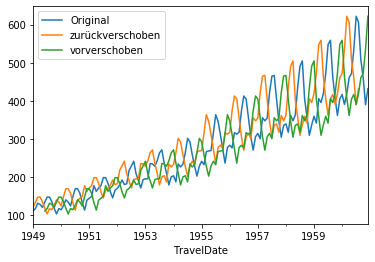

In [16]:
AirP["s_4"] = AirP["Passengers"].shift(-4)
AirP["s_-5"] = AirP["Passengers"].shift(5)
AirP["Passengers"].plot()
AirP["s_4"].plot()
AirP["s_-5"].plot()
plt.legend(["Original", "zurückverschoben", "vorverschoben"])
plt.show()

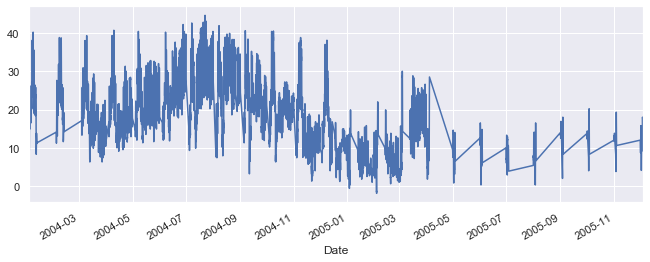

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
AirQ = pd.read_csv("../01 Modulunterlagen/SW10/AirQualityUCI.csv", sep = ";", decimal = ",")
AirQ1 = AirQ.copy()
# pandas kennt das Zeitformat in der Tabelle nicht:
# Punkt muss durch - ersetzt werden
AirQ1["Time"] = AirQ1["Time"].str.replace(".", ":")
AirQ1["Date"] = pd.to_datetime(AirQ1["Date"] + " " + AirQ1["Time"])
AirQ1.set_index("Date", inplace = True)
# Einige Werte der Temperatur sind -200. Diese Zeilen werden weggelassen
AirQ1 = AirQ1[AirQ1["T"] > -20]
AirQ1["T"].plot()
plt.show()

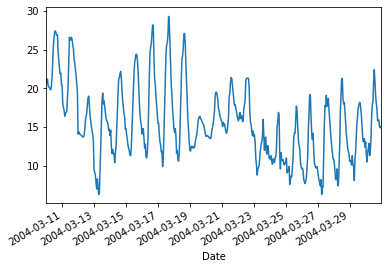

In [19]:
AirQ4 = AirQ1.loc["2004-3-10" : "2004-3-30" , "T"]
AirQ4.plot()

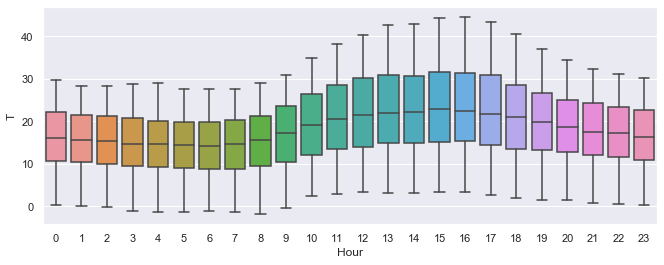

In [20]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
AirQ1['Hour'] = AirQ1.index.hour
AirQ4 = AirQ1.loc["2004-3-10" : "2004-3-30"]
sns.boxplot(data=AirQ1, x='Hour', y="T")

In [31]:
#Example who isn't working (from prof)
AirQ1 = AirQ.copy()
# Resample to weekly frequency, aggregating with mean
AirQ1_weekly_mean = AirQ1['T'].resample('W').mean()
AirQ1_weekly_mean.head(3)
print(AirQ1_weekly_mean.head(3))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

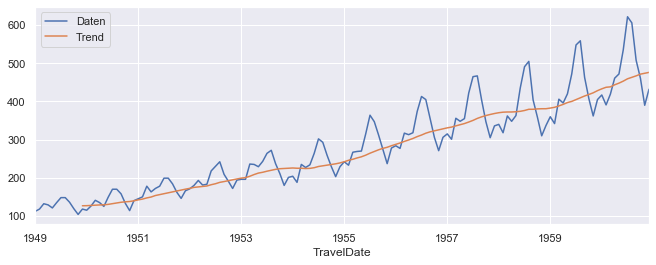

In [34]:
AirP["Trend"] = AirP["Passengers"].rolling(window = 12).mean()
AirP["Passengers"].plot()
AirP["Trend"].plot()
plt.legend(["Daten", "Trend"])
plt.show()

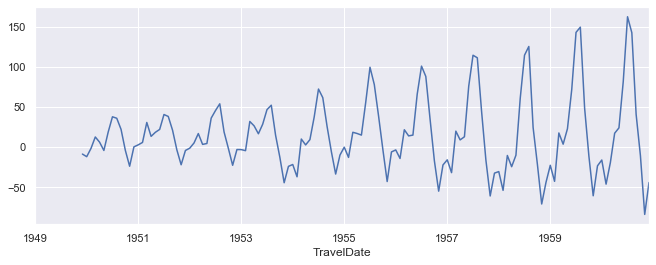

In [35]:
AirP["Season"] = AirP["Passengers"] - AirP["Trend"]
AirP["Season"].plot()
plt.show()

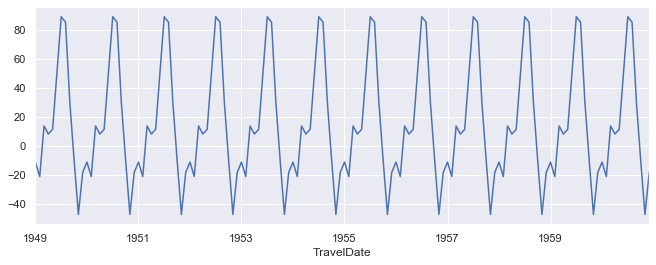

In [38]:
# AirP["Season"] wird in eine Matrix umgewandelt
# mit den Monaten als Spalten (Jahre als Zeilen)
AirP2 = AirP["Season"].values.reshape((12, 12))
# Entlang der Spalten (axis=0) wird der Mittelwert genommen
# nanmean bedeutet, die NaN werden ignoriert
ave = np.nanmean(AirP2, axis = 0)
# Der Vektor ave wird verzwölffacht,
# damit er wieder die gleiche Länge hat, wie AirP["Season"]
AirP["Season_ave"] = np.tile(A = ave, reps = 12)
AirP["Season_ave"].plot()
plt.show()

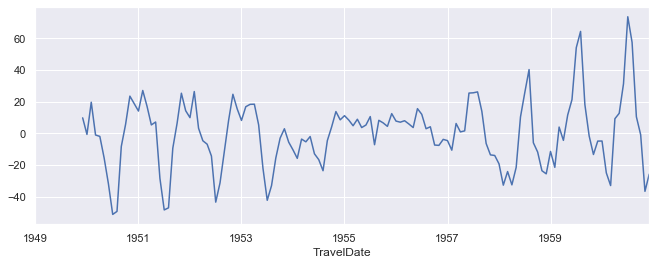

In [39]:
AirP["Residual"] = AirP["Season"] - AirP["Season_ave"]
AirP["Residual"].plot()
plt.show()

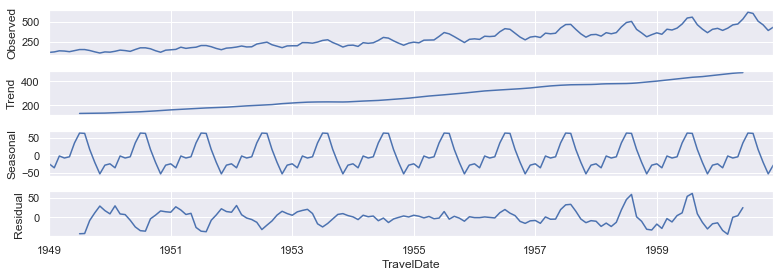

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(AirP["Passengers"], model = "additive", freq = 12).plot()
plt.show()

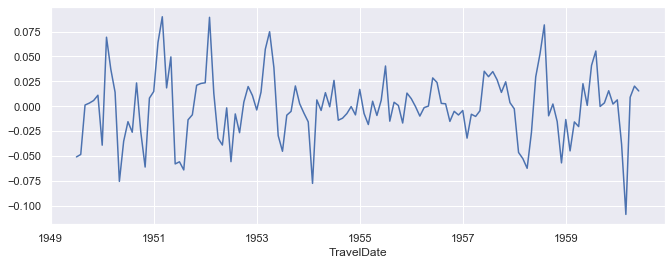

In [41]:
seasonal_decompose(np.log(AirP["Passengers"]), model = "add").resid.plot()
plt.show()

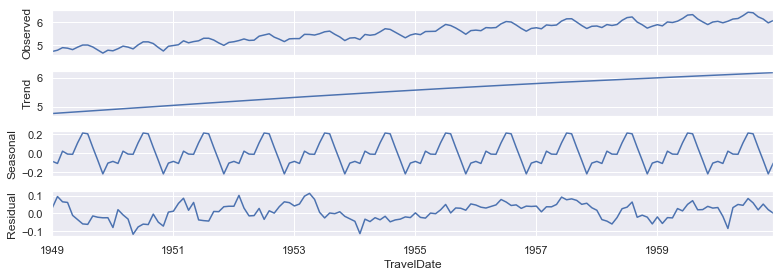

In [43]:
import numpy as np
from stldecompose import decompose
decompose(np.log(AirP["Passengers"]), period = 12).plot();